# Partie Modèle 

In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 30)
pd.pandas.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('beer.csv', sep=';', na_values='?')

In [ ]:
df['Id'] = df['Id'].astype(str)
df['PROD_SugarScale'] = df['PROD_SugarScale'].astype(str)

In [ ]:
df.dtypes

Id                       object
BEER_Size(L)            float64
PROD_OriginalGravity    float64
BEER_FinalGravity       float64
BEER_AlcoholByVolume    float64
BEER_IBU                float64
BEER_Color              float64
PROD_BoilSize           float64
PROD_BoilTime           float64
PROD_BoilGravity        float64
PROD_Efficiency         float64
PROD_MashThickness      float64
PROD_SugarScale          object
PROD_BrewMethod          object
PROD_PitchRate          float64
PROD_PrimaryTemp        float64
PROD_ExcessGravity      float64
Style                    object
dtype: object

In [ ]:
df

,Id,BEER_Size(L),PROD_OriginalGravity,BEER_FinalGravity,BEER_AlcoholByVolume,BEER_IBU,BEER_Color,PROD_BoilSize,PROD_BoilTime,PROD_BoilGravity,PROD_Efficiency,PROD_MashThickness,PROD_SugarScale,PROD_BrewMethod,PROD_PitchRate,PROD_PrimaryTemp,PROD_ExcessGravity,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,60.0,1.057,78.0,1.20,0.0,All Grain,0.50,20.00,60.71,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,6.42,7.57,60.0,1.052,40.0,1.30,0.0,extract,0.50,20.00,60.62,American IPA
2,4,21.77,1.061,1.013,6.25,100.20,3.90,23.66,15.0,1.045,35.0,4.00,0.0,extract,0.75,20.00,60.61,American IPA
3,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60.0,1.038,65.0,5.00,0.0,All Grain,1.00,19.00,60.50,American Pale Ale
4,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60.0,1.064,70.0,1.25,0.0,All Grain,0.75,17.78,60.75,American IPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14069,17290,16.09,1.060,NaN,6.11,135.30,29.22,17.03,60.0,1.056,35.0,NaN,0.0,extract,0.35,21.11,60.60,American IPA
14070,17843,20.00,1.061,1.011,6.52,148.68,11.48,26.00,60.0,1.047,70.0,3.00,0.0,All Grain,1.25,18.00,60.61,American IPA
14071,20785,10.00,1.050,1.010,5.31,44.04,5.87,12.00,70.0,1.042,73.0,NaN,0.0,All Grain,0.35,20.00,60.50,American Pale Ale
14072,3211,21.00,1.071,1.020,6.78,55.04,NaN,28.50,60.0,NaN,75.0,NaN,0.0,All Grain,NaN,20.00,60.71,American IPA


In [ ]:
a = df.isnull().sum(axis=0).reset_index()
a.columns = ['column', 'null_values']
a.sort_values(by='null_values', ascending=False)

,column,null_values
14,PROD_PitchRate,7542
11,PROD_MashThickness,5827
15,PROD_PrimaryTemp,3969
3,BEER_FinalGravity,1340
13,PROD_BrewMethod,1332
9,PROD_BoilGravity,1162
4,BEER_AlcoholByVolume,692
7,PROD_BoilSize,689
2,PROD_OriginalGravity,678
16,PROD_ExcessGravity,678


###Analyse univariée variables numériques

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


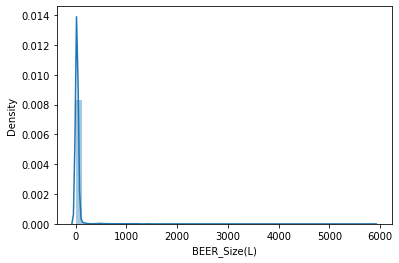

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


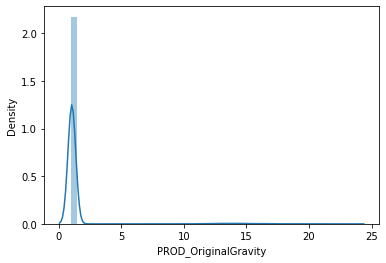

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


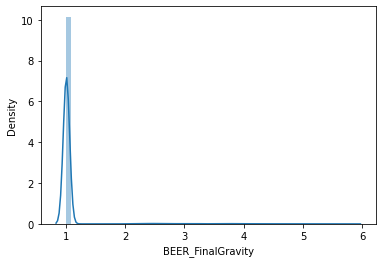

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


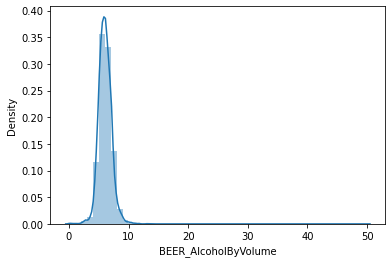

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


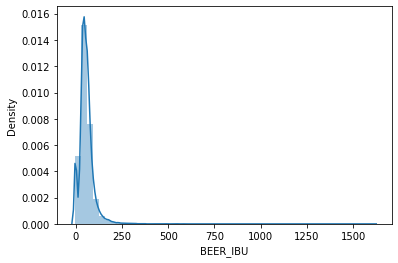

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


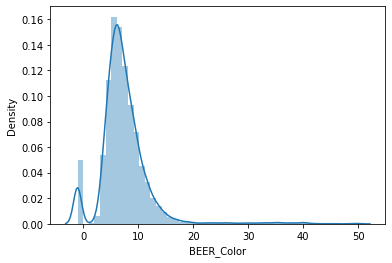

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


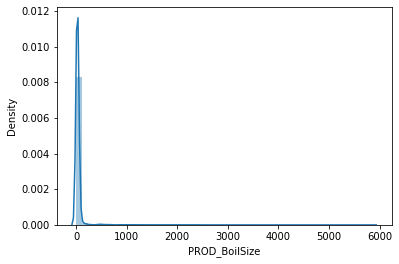

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


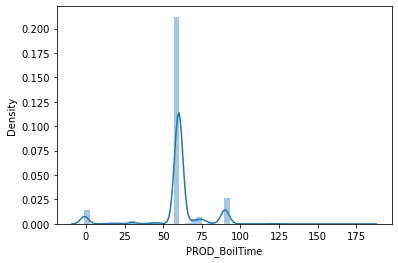

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


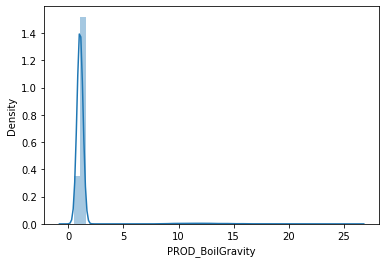

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


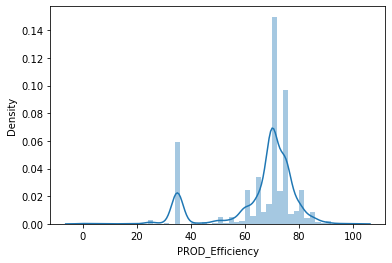

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


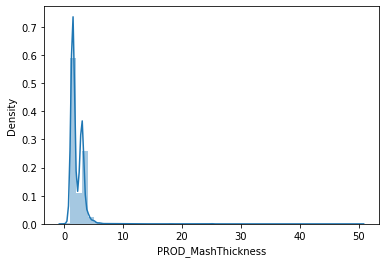

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


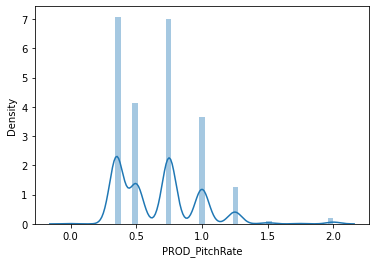

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


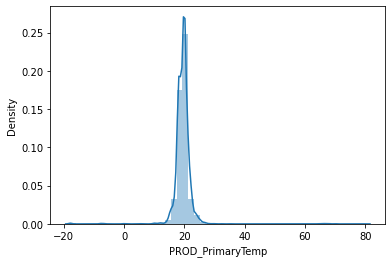

<ipython-input-39-ea1908529e79>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


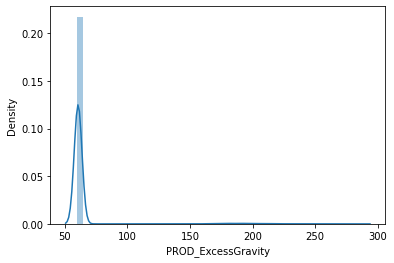

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        sns.distplot(df[column])
        plt.show()

###Analyse univariée variables catégorielles

In [ ]:
df = df.drop('Id', axis=1)

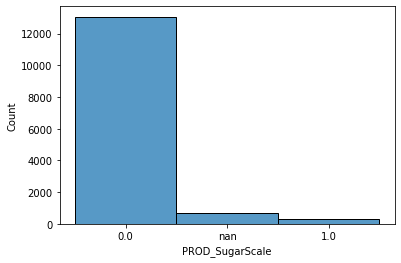

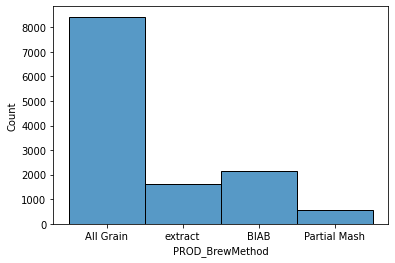

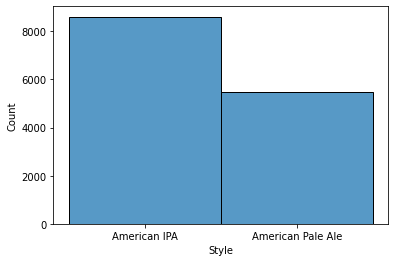

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        sns.histplot(df[column])
        plt.show()

### Analyse multivariée variables numériques

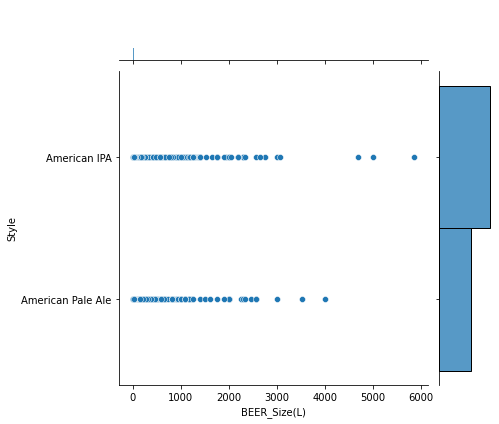

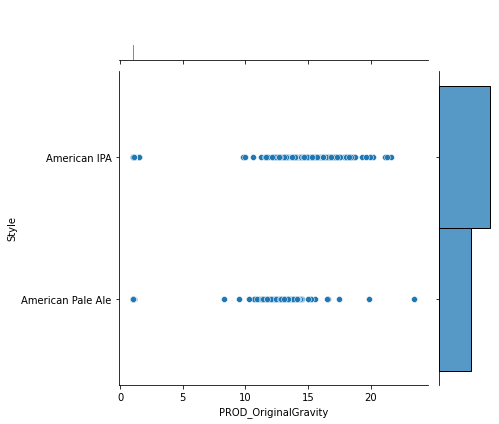

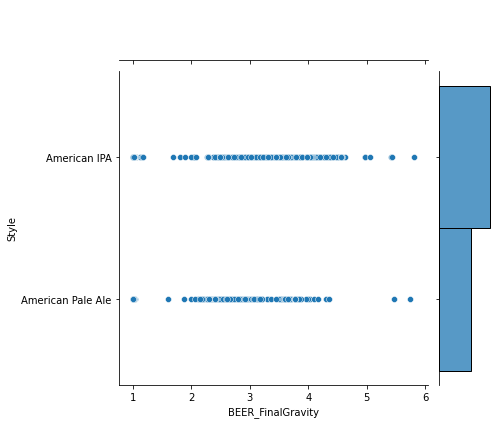

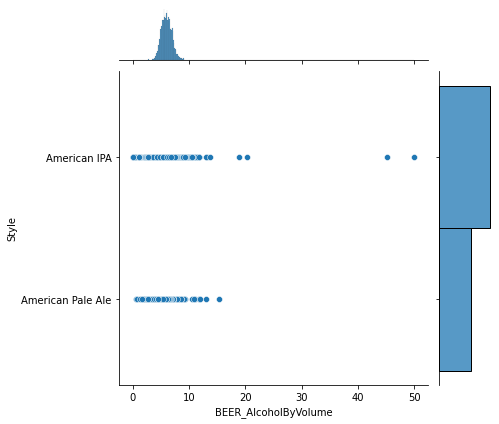

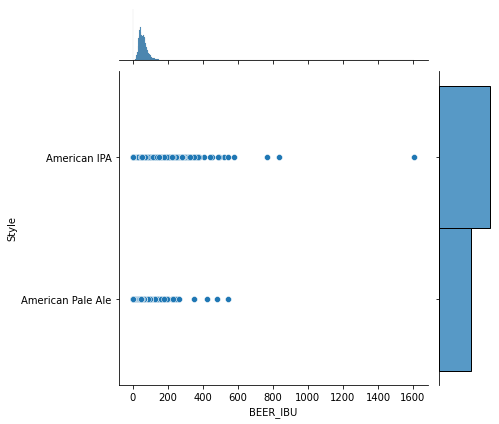

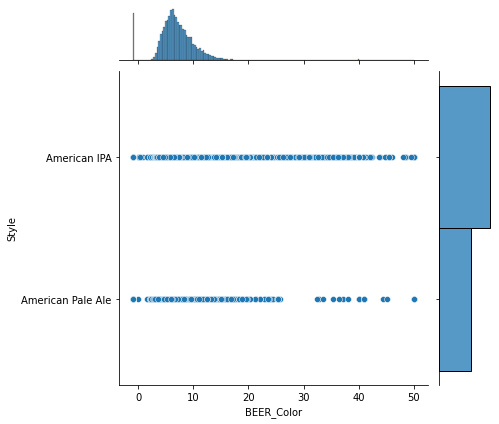

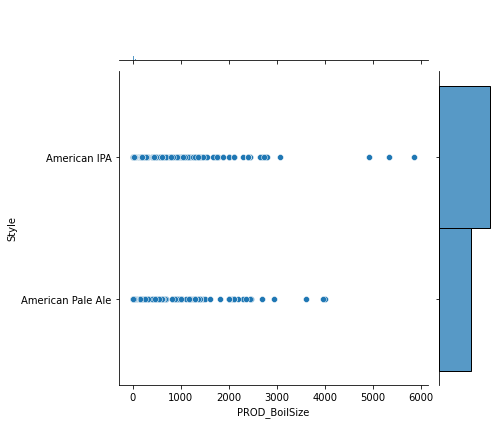

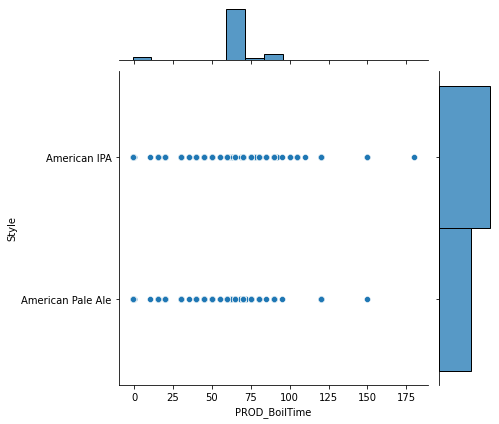

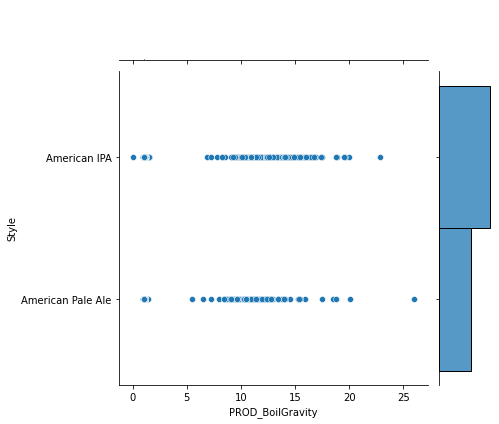

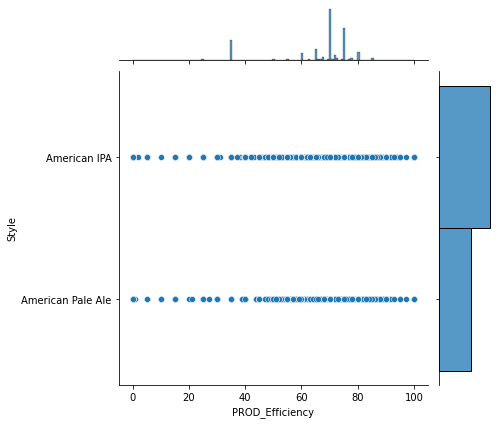

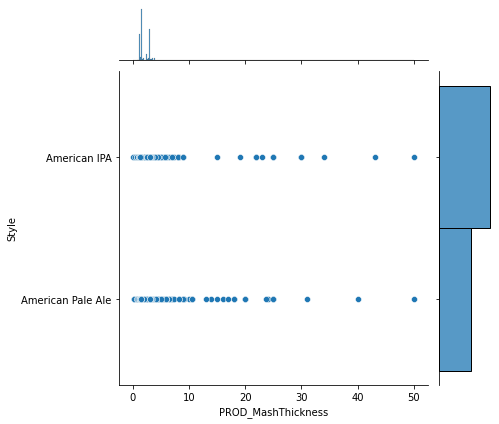

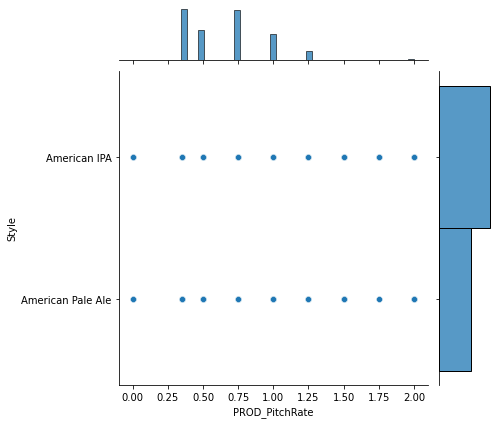

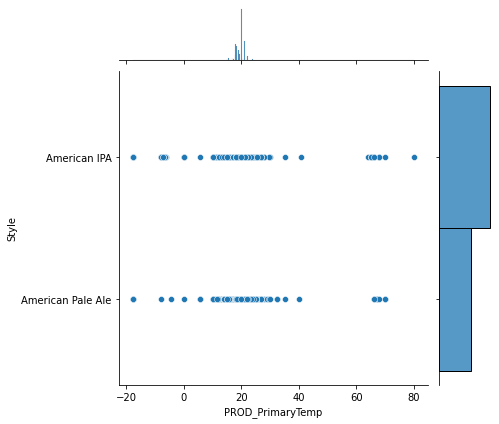

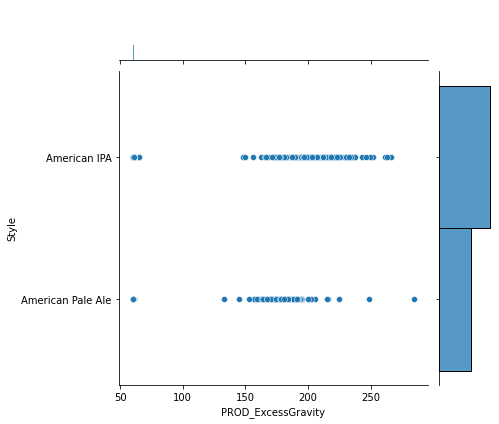

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        sns.jointplot(df, x=column, y="Style")
        plt.show()

### Analyse multivariée variables catégorielles

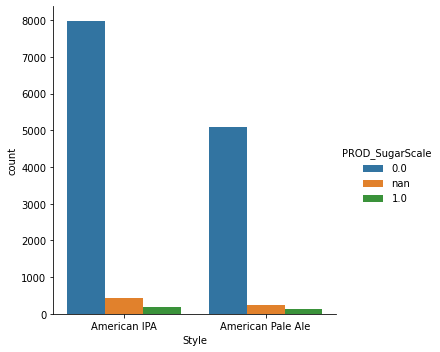

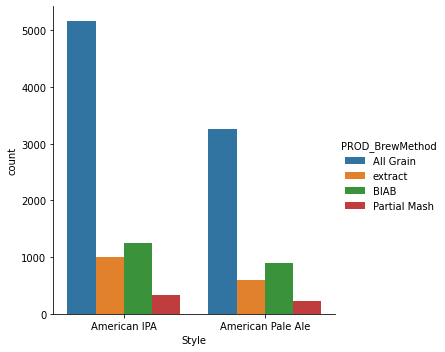

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object' and column != 'Style':
        sns.catplot(x='Style', hue=column, kind='count', data=df)

        plt.show()

<Axes: >

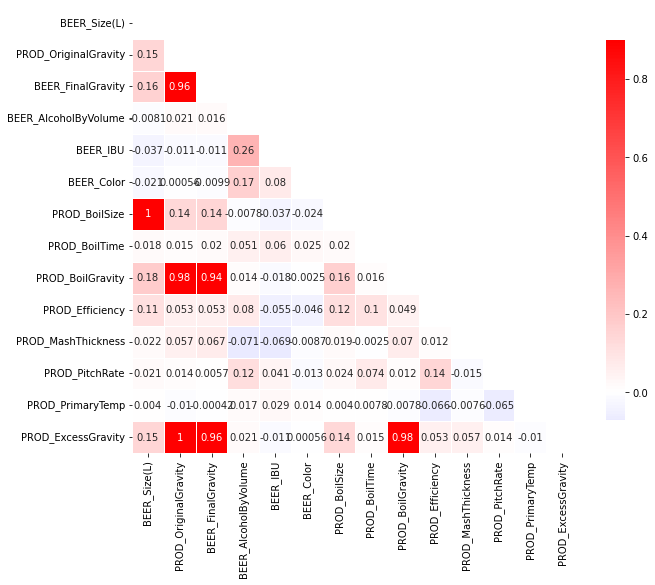

In [ ]:
corr = df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10,10))
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle
sns.heatmap(corr, mask=mask, vmax = 0.9, cmap='bwr', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7}, center=0)

###Gérer les valeurs manquantes

In [ ]:
a = df.isnull().sum(axis=0).reset_index()
a.columns = ['column', 'null_values']
a.sort_values(by='null_values', ascending=False)

,column,null_values
13,PROD_PitchRate,7542
10,PROD_MashThickness,5827
14,PROD_PrimaryTemp,3969
2,BEER_FinalGravity,1340
12,PROD_BrewMethod,1332
8,PROD_BoilGravity,1162
3,BEER_AlcoholByVolume,692
6,PROD_BoilSize,689
1,PROD_OriginalGravity,678
15,PROD_ExcessGravity,678


In [ ]:
df = df.drop(['PROD_PitchRate','PROD_MashThickness','PROD_PrimaryTemp'],  axis=1) #trop de valeurs manquantes comparé aux nombre de données

In [ ]:
df.sample(1)

,BEER_Size(L),PROD_OriginalGravity,BEER_FinalGravity,BEER_AlcoholByVolume,BEER_IBU,BEER_Color,PROD_BoilSize,PROD_BoilTime,PROD_BoilGravity,PROD_Efficiency,PROD_SugarScale,PROD_BrewMethod,PROD_ExcessGravity,Style
13907,18.93,1.065,1.016,6.37,44.76,NaN,22.71,60.0,1.054,70.0,0.0,All Grain,60.65,American Pale Ale


In [ ]:
df['BEER_FinalGravity'].fillna(df['BEER_FinalGravity'].mean(), inplace=True) #float
df['PROD_BoilGravity'].fillna(df['PROD_BoilGravity'].mean(), inplace=True)
df['BEER_AlcoholByVolume'].fillna(df['BEER_AlcoholByVolume'].mean(), inplace=True)
df['PROD_BoilSize'].fillna(df['PROD_BoilSize'].mean(), inplace=True)
df['PROD_OriginalGravity'].fillna(df['PROD_OriginalGravity'].mean(), inplace=True)
df['PROD_ExcessGravity'].fillna(df['PROD_ExcessGravity'].mean(), inplace=True)
df['PROD_Efficiency'].fillna(df['PROD_Efficiency'].mean(), inplace=True)
df['BEER_Color'].fillna(df['BEER_Color'].mean(), inplace=True)
df['PROD_BoilTime'].fillna(df['PROD_BoilTime'].mean(), inplace=True)
df['BEER_IBU'].fillna(df['BEER_IBU'].mean(), inplace=True)

In [ ]:
df['PROD_BrewMethod'].fillna(df['PROD_BrewMethod'].mode().iloc[0], inplace=True)

In [ ]:
df['PROD_SugarScale'] = df['PROD_SugarScale'].replace('nan', '0.0')

###Encodage Onehot

In [ ]:
df = pd.get_dummies(df, columns=['PROD_BrewMethod'])
df.head()

,BEER_Size(L),PROD_OriginalGravity,BEER_FinalGravity,BEER_AlcoholByVolume,BEER_IBU,BEER_Color,PROD_BoilSize,PROD_BoilTime,PROD_BoilGravity,PROD_Efficiency,PROD_SugarScale,PROD_ExcessGravity,Style,PROD_BrewMethod_All Grain,PROD_BrewMethod_BIAB,PROD_BrewMethod_Partial Mash,PROD_BrewMethod_extract
0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,60.0,1.057,78.0,0.0,60.71,American IPA,1,0,0,0
1,7.57,1.062,1.016,6.14,138.44,6.42,7.57,60.0,1.052,40.0,0.0,60.62,American IPA,0,0,0,1
2,21.77,1.061,1.013,6.25,100.20,3.90,23.66,15.0,1.045,35.0,0.0,60.61,American IPA,0,0,0,1
3,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60.0,1.038,65.0,0.0,60.50,American Pale Ale,1,0,0,0
4,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60.0,1.064,70.0,0.0,60.75,American IPA,1,0,0,0


###Entrainement modèle

In [ ]:
df = df.drop(['PROD_ExcessGravity','PROD_BoilGravity','BEER_Size(L)'],  axis=1)   #très fortes corrélations avec d'autres variables

In [ ]:
df["Style"] = df["Style"].replace({"American IPA": 0, "American Pale Ale": 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["PROD_SugarScale"] = le.fit_transform(df["PROD_SugarScale"])

In [ ]:
X = df.drop('Style', axis=1)
y = df['Style']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

#XGboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
params = {'max_depth': 5, 'learning_rate': 0.1}

model = XGBClassifier(**params)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8240587260241534
Precision: 0.7830248883216337
Recall: 0.752760736196319
F1 score: 0.7675946199562089


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[2253  340]
 [ 403 1227]]


###Interprétabilité

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


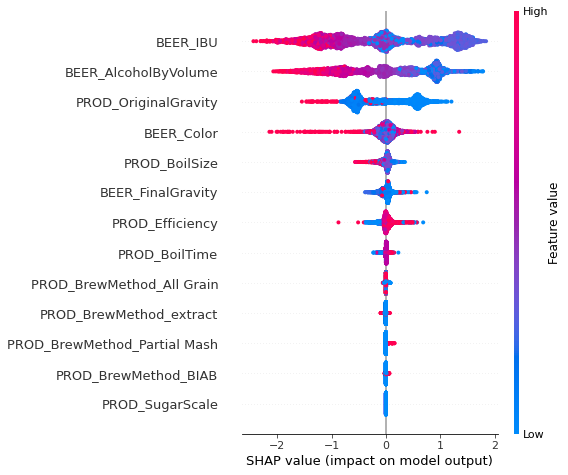

In [ ]:
shap.summary_plot(shap_values, X_test)